# Data Exploration

## Testing

In [1]:
# imports
import requests
import pandas as pd
from matplotlib import pyplot as plt
import datetime

In [2]:
df20 = pd.read_csv('input/2020-08-20_sds011_sensor_6842.csv', sep=';')
df21 = pd.read_csv('input/2020-08-21_sds011_sensor_6842.csv', sep=';')
df22 = pd.read_csv('input/2020-08-22_sds011_sensor_6842.csv', sep=';')
df23 = pd.read_csv('input/2020-08-23_sds011_sensor_6842.csv', sep=';')
df24 = pd.read_csv('input/2020-08-24_sds011_sensor_6842.csv', sep=';')

In [3]:
df20

,sensor_id,sensor_type,location,lat,lon,timestamp,P1,durP1,ratioP1,P2,durP2,ratioP2
0,6842,SDS011,3460,52.028,8.916,2020-08-20T00:01:37,4.47,NaN,NaN,1.50,NaN,NaN
1,6842,SDS011,3460,52.028,8.916,2020-08-20T00:04:09,3.87,NaN,NaN,1.23,NaN,NaN
2,6842,SDS011,3460,52.028,8.916,2020-08-20T00:06:41,2.20,NaN,NaN,1.23,NaN,NaN
3,6842,SDS011,3460,52.028,8.916,2020-08-20T00:09:12,2.83,NaN,NaN,1.30,NaN,NaN
4,6842,SDS011,3460,52.028,8.916,2020-08-20T00:11:44,4.10,NaN,NaN,1.50,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
562,6842,SDS011,3460,52.028,8.916,2020-08-20T23:47:15,1.50,NaN,NaN,1.00,NaN,NaN
563,6842,SDS011,3460,52.028,8.916,2020-08-20T23:49:47,1.83,NaN,NaN,1.00,NaN,NaN
564,6842,SDS011,3460,52.028,8.916,2020-08-20T23:52:23,2.20,NaN,NaN,1.37,NaN,NaN
565,6842,SDS011,3460,52.028,8.916,2020-08-20T23:54:54,2.77,NaN,NaN,1.27,NaN,NaN


In [4]:
df20['timestamp'] = pd.to_datetime(df20['timestamp'])
df21['timestamp'] = pd.to_datetime(df21['timestamp'])
df22['timestamp'] = pd.to_datetime(df22['timestamp'])
df23['timestamp'] = pd.to_datetime(df23['timestamp'])
df24['timestamp'] = pd.to_datetime(df24['timestamp'])

In [5]:
df = pd.concat([df20, df21, df22, df23, df24], axis = 0)
#df20 = df20.set_index('timestamp')
df = df.set_index('timestamp')
#df = pd.concat([df20, df21, df22, df23, df24], axis = 0)
#df = df20.copy()

In [6]:
df

,sensor_id,sensor_type,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
timestamp,,,,,,,,,,,
2020-08-20 00:01:37,6842,SDS011,3460,52.028,8.916,4.47,NaN,NaN,1.50,NaN,NaN
2020-08-20 00:04:09,6842,SDS011,3460,52.028,8.916,3.87,NaN,NaN,1.23,NaN,NaN
2020-08-20 00:06:41,6842,SDS011,3460,52.028,8.916,2.20,NaN,NaN,1.23,NaN,NaN
2020-08-20 00:09:12,6842,SDS011,3460,52.028,8.916,2.83,NaN,NaN,1.30,NaN,NaN
2020-08-20 00:11:44,6842,SDS011,3460,52.028,8.916,4.10,NaN,NaN,1.50,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-24 23:49:53,6842,SDS011,3460,52.028,8.916,12.30,NaN,NaN,9.23,NaN,NaN
2020-08-24 23:52:24,6842,SDS011,3460,52.028,8.916,12.53,NaN,NaN,10.10,NaN,NaN
2020-08-24 23:54:56,6842,SDS011,3460,52.028,8.916,12.87,NaN,NaN,10.40,NaN,NaN


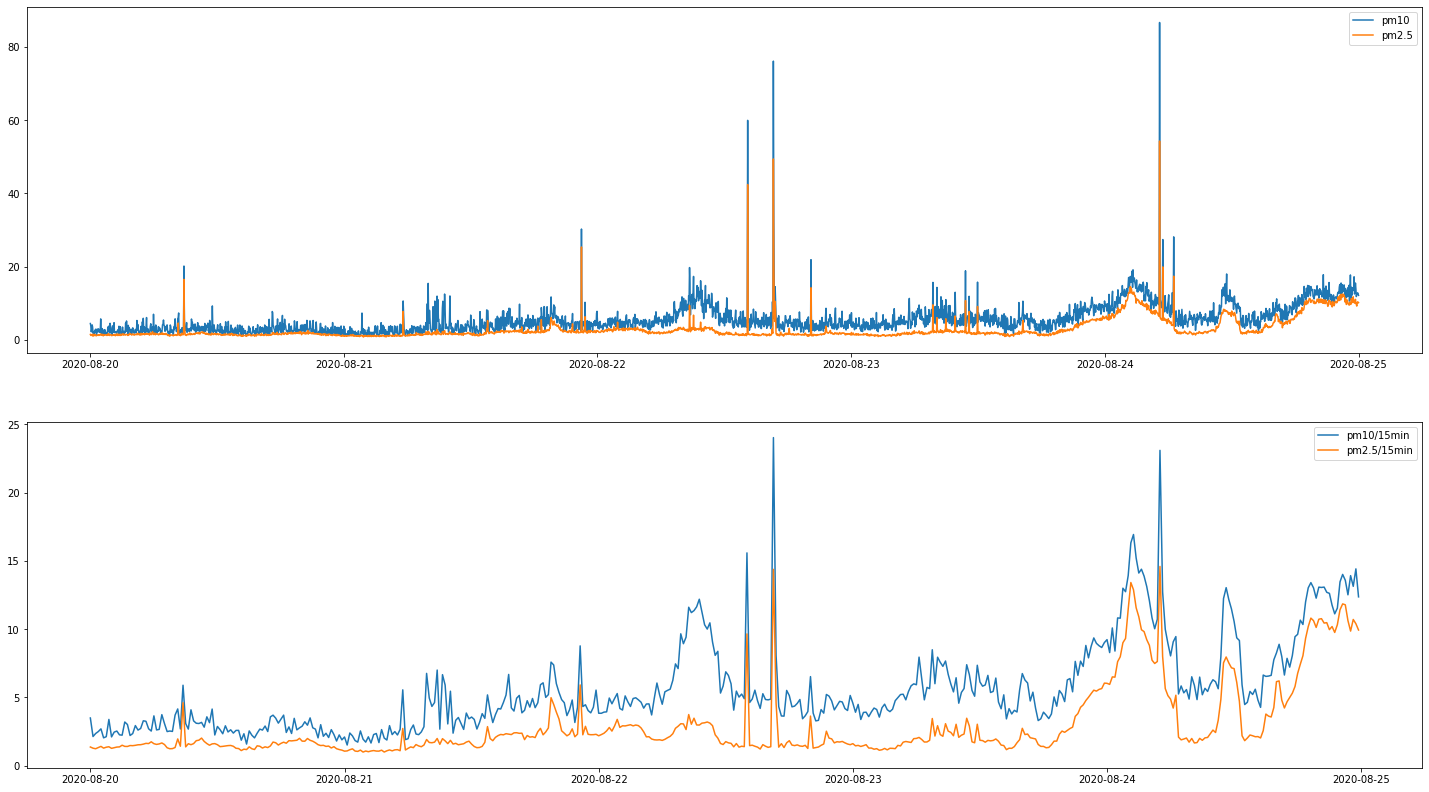

In [7]:
plt.figure(figsize = [25, 14])

plt.subplot(211)
plt.plot(df['P1'], '-', label = 'pm10')
plt.plot(df['P2'], '-', label = 'pm2.5')
plt.legend()


resampleTime = 15
df = df.resample(f'{resampleTime}min').mean()
plt.subplot(212)
plt.plot(df['P1'], '-', label = f'pm10/{resampleTime}min')
plt.plot(df['P2'], '-', label = f'pm2.5/{resampleTime}min')
plt.legend()

plt.show()

# Getting Data

In [8]:
date = datetime.datetime.strptime('2020-07-01', '%Y-%m-%d').date()
test = []
while date < datetime.datetime.now().date():
    d = date.strftime('%Y-%m-%d')
    print(d)
    test.append(pd.read_csv(f'https://archive.sensor.community/{d}/{d}_sds011_sensor_6842.csv', sep = ';'))
    date += datetime.timedelta(days = 1)

2020-07-01
2020-07-02
2020-07-03
2020-07-04
2020-07-05
2020-07-06
2020-07-07
2020-07-08
2020-07-09
2020-07-10
2020-07-11
2020-07-12
2020-07-13
2020-07-14
2020-07-15
2020-07-16
2020-07-17
2020-07-18
2020-07-19
2020-07-20
2020-07-21
2020-07-22
2020-07-23
2020-07-24
2020-07-25
2020-07-26
2020-07-27
2020-07-28
2020-07-29
2020-07-30
2020-07-31
2020-08-01
2020-08-02
2020-08-03
2020-08-04
2020-08-05
2020-08-06
2020-08-07
2020-08-08
2020-08-09
2020-08-10
2020-08-11
2020-08-12
2020-08-13
2020-08-14
2020-08-15
2020-08-16
2020-08-17
2020-08-18
2020-08-19
2020-08-20
2020-08-21
2020-08-22
2020-08-23
2020-08-24
2020-08-25
2020-08-26
2020-08-27
2020-08-28
2020-08-29


In [9]:
comp = test[0]
for i in range(1, len(test)):
    comp = pd.concat([comp, test[i]], axis = 0)
del test

In [10]:
comp

,sensor_id,sensor_type,location,lat,lon,timestamp,P1,durP1,ratioP1,P2,durP2,ratioP2
0,6842,SDS011,3460,52.028,8.916,2020-07-01T00:00:22,2.77,NaN,NaN,1.47,NaN,NaN
1,6842,SDS011,3460,52.028,8.916,2020-07-01T00:02:49,2.83,NaN,NaN,1.43,NaN,NaN
2,6842,SDS011,3460,52.028,8.916,2020-07-01T00:05:15,4.40,NaN,NaN,1.60,NaN,NaN
3,6842,SDS011,3460,52.028,8.916,2020-07-01T00:07:42,3.17,NaN,NaN,1.40,NaN,NaN
4,6842,SDS011,3460,52.028,8.916,2020-07-01T00:10:08,4.00,NaN,NaN,1.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
557,6842,SDS011,3460,52.028,8.916,2020-08-29T23:48:01,3.77,NaN,NaN,3.03,NaN,NaN
558,6842,SDS011,3460,52.028,8.916,2020-08-29T23:50:29,6.73,NaN,NaN,4.47,NaN,NaN
559,6842,SDS011,3460,52.028,8.916,2020-08-29T23:53:00,5.13,NaN,NaN,4.50,NaN,NaN
560,6842,SDS011,3460,52.028,8.916,2020-08-29T23:55:32,7.60,NaN,NaN,4.40,NaN,NaN


In [11]:
comp['timestamp'] = pd.to_datetime(comp['timestamp'])
comp = comp.set_index('timestamp')

In [12]:
comp

,sensor_id,sensor_type,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
timestamp,,,,,,,,,,,
2020-07-01 00:00:22,6842,SDS011,3460,52.028,8.916,2.77,NaN,NaN,1.47,NaN,NaN
2020-07-01 00:02:49,6842,SDS011,3460,52.028,8.916,2.83,NaN,NaN,1.43,NaN,NaN
2020-07-01 00:05:15,6842,SDS011,3460,52.028,8.916,4.40,NaN,NaN,1.60,NaN,NaN
2020-07-01 00:07:42,6842,SDS011,3460,52.028,8.916,3.17,NaN,NaN,1.40,NaN,NaN
2020-07-01 00:10:08,6842,SDS011,3460,52.028,8.916,4.00,NaN,NaN,1.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-29 23:48:01,6842,SDS011,3460,52.028,8.916,3.77,NaN,NaN,3.03,NaN,NaN
2020-08-29 23:50:29,6842,SDS011,3460,52.028,8.916,6.73,NaN,NaN,4.47,NaN,NaN
2020-08-29 23:53:00,6842,SDS011,3460,52.028,8.916,5.13,NaN,NaN,4.50,NaN,NaN


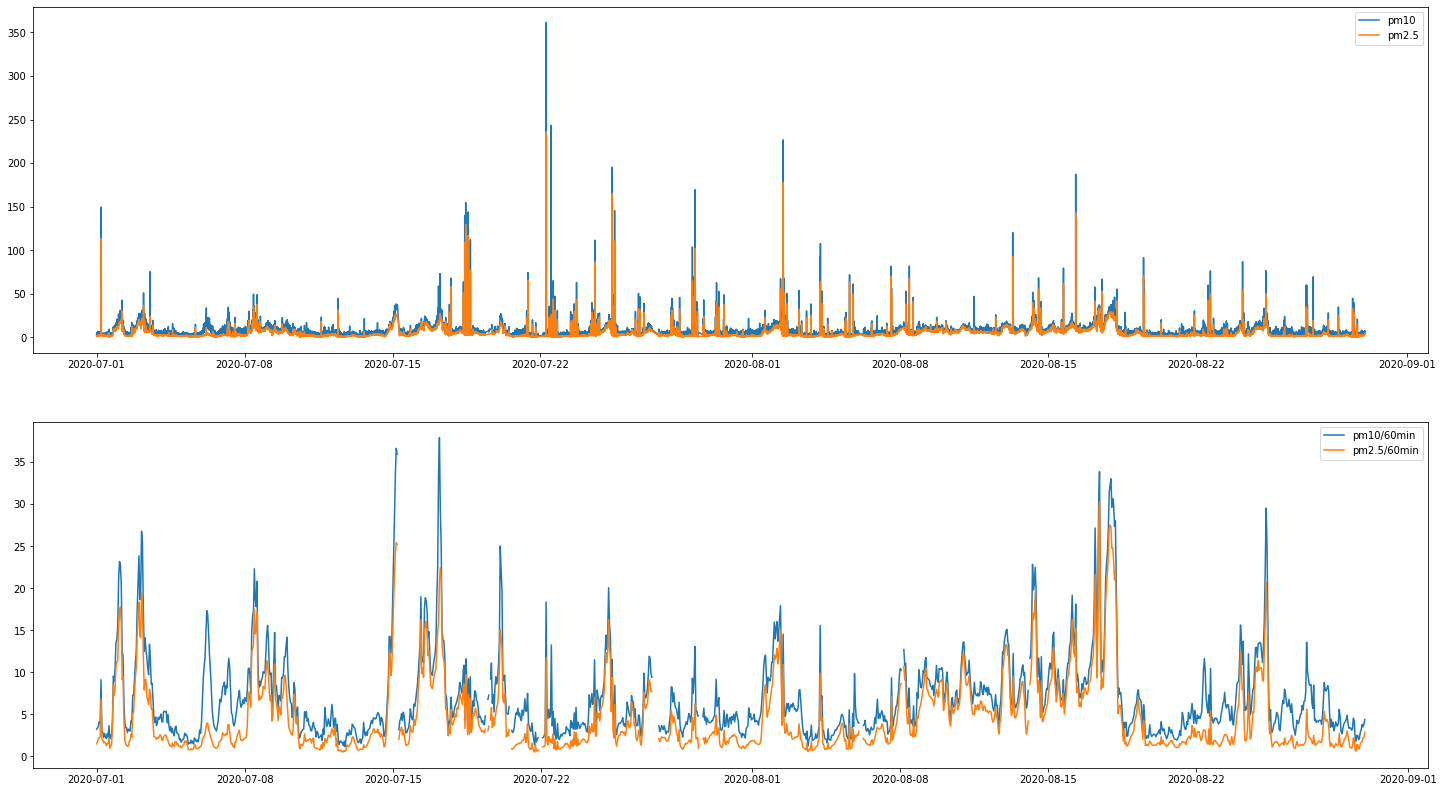

In [13]:
plt.figure(figsize = [25, 14])

plt.subplot(211)
plt.plot(comp['P1'], '-', label = 'pm10')
plt.plot(comp['P2'], '-', label = 'pm2.5')
plt.legend()


resampleTime = 60
comp = comp.resample(f'{resampleTime}min').mean()
plt.subplot(212)
plt.plot(comp['P1'], '-', label = f'pm10/{resampleTime}min')
plt.plot(comp['P2'], '-', label = f'pm2.5/{resampleTime}min')
plt.legend()

plt.show()